In [1]:
using Pkg
Pkg.activate(".")
Pkg.add([
    PackageSpec(name="SimilaritySearch", version="0.8"),
    PackageSpec(name="InvertedFiles", version="0.1"),
    PackageSpec(url="https://github.com/sadit/UMAP.jl", rev="bdcde9a54907f3e17b74317a0a94e9ff9c6ab701"),
    PackageSpec(name="GR"),
    PackageSpec(name="Primes")
])

using SimilaritySearch, UMAP, Primes, GR, SparseArrays, LinearAlgebra, InvertedFiles

  Activating project at `~/Research/SimilaritySearchDemos/synthetic`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Research/SimilaritySearchDemos/synthetic/Project.toml`
  No Changes to `~/Research/SimilaritySearchDemos/synthetic/Manifest.toml`


# Prime numbers
This demonstration is about prime numbers and its similarity based on its factors. While this is not a _synthetic database_, it does not requires to download any dataset.

In [2]:
function intersection_(U, V)
    if length(U) > length(V)
        U, V = V, U
    end
    
    d = 0
    for u in U
        if u in V
            d +=1
        end
    end

    d
end

struct JaccardSet <: SemiMetric end

function SimilaritySearch.evaluate(::JaccardSet, U, V)
    d = intersection_(U, V)
    1 - d / (length(U) + length(V) - d)
end

struct CosineDistanceSet <: SemiMetric end

function SimilaritySearch.evaluate(::CosineDistanceSet, U, V)
    d = intersection_(U, V)
    1 - d / (sqrt(length(U)) * sqrt(length(V)))
end

struct IntersectionDissSet <: SemiMetric end

function SimilaritySearch.evaluate(::IntersectionDissSet, U, V)
    d = intersection_(U, V)
    1 / (d + 1)
end

In [3]:
n = 100_000
F = Vector{Set{Int}}(undef, n)

for i in 1:n
    F[i] = factor(Set, i)
    push!(F[i], 1)
end

#=
for f in F
    normalize!(f)
end =#

In [4]:
#dist = JaccardSet()
dist = CosineDistanceSet()
#dist = IntersectionDissSet()
db = VectorDatabase(F)
G = SearchGraph(; db, dist)
push!(G.callbacks, OptimizeParameters(kind=ParetoRecall()))
index!(G; parallel_block=256)
IJulia.clear_output()

0

In [5]:
U = UMAP_(G, 2; n_neighbors=15, init=:random)

(n, n_neighbors, n_components) = (100000, 32, 2)


*** computing allknn graph
*** computing graph
*** init embedding
*** fit ab / embedding
*** opt embedding


UMAP_{SparseMatrixCSC{Float32, Int32}, Matrix{Float32}, SearchGraph{CosineDistanceSet, VectorDatabase{Set{Int64}}, BeamSearch}}(sparse(Int32[2, 3, 4, 8, 13, 16, 17, 19, 23, 32  …  96550, 96650, 97450, 97550, 98650, 98950, 99350, 99650, 99850, 99950], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000], Float32[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 100000, 100000), Float32[-6.995545 -18.646248 … -4.9827895 9.941812; 0.9299734 -1.1079111 … 2.1714754 0.7980471], SearchGraph{CosineDistanceSet, VectorDatabase{Set{Int64}}, BeamSearch}
  dist: CosineDistanceSet CosineDistanceSet()
  db: VectorDatabase{Set{Int64}}
  links: Array{Vector{Int32}}((100000,))
  locks: Array{Base.Threads.SpinLock}((100000,))
  hints: Array{Int32}((106,)) Int32[271, 501, 557, 695, 753, 949, 1030, 1077, 1090, 1119  …  11571, 11660, 11780, 11817, 11937, 11960, 12648, 12717, 12792, 13013]
  sea

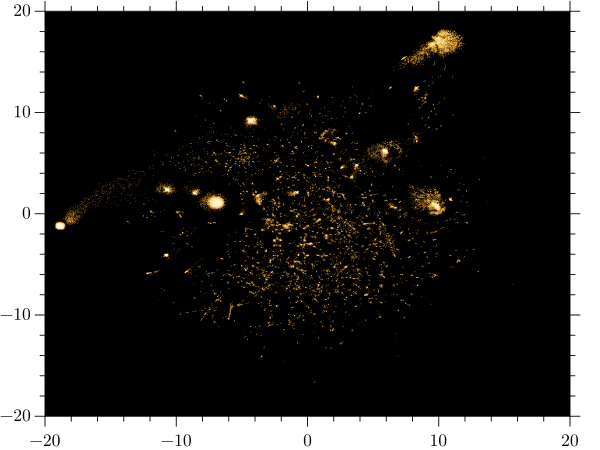

In [6]:
#scatter(, fmt=:png, c=:green, ma=0.3, a=0.3, ms=1, msw=0, label="")
shade(view(U.embedding, 1, :), view(U.embedding, 2, :), colormap=3)